# Fractal VR TMT analysis. (in R)


This notebook is running behavioral analysis of Fractal VR data. 


Only needed to be done once:

In [3]:
packages <- c(
  "ez", "emmeans", "cowplot", "dplyr", "readr", "ggplot2", "lmerTest", 
  "hrbrthemes", "sjPlot", "sjmisc", "sjlabelled", "tidyr", "tidyverse", 
  "ggthemes", "ggpubr", "knitr", "jtools", "apaTables", "psych", "boot"
)

install.packages(packages)


Die heruntergeladenen Bin"arpakete sind in 
	/var/folders/yr/7rrnl49x4hlcxhdhq2vmvh7c0000gn/T//RtmpLpC1eF/downloaded_packages


In [4]:
# load libraries
library(ez)
citation("ez")
library(emmeans)
citation("emmeans")

# Plotting and formatting
library(cowplot)
library(dplyr)
library(readr) 
library(ggplot2)
#library(lmerTest)
library(hrbrthemes)
library(sjPlot)
library(sjmisc)
library(sjlabelled)
# Raincloud plot( from https://github.com/RainCloudPlots/RainCloudPlots):
# this file needs to be in the same directory as the script
source('R_rainclouds.R')
library(tidyr)
library(tidyverse)
library(ggthemes)
library(ggpubr)
# Formatting
library(knitr)
library(jtools)
library(apaTables)
# Reliability
library(psych)
library(tidyr)
library(boot)


Um Paket 'ez' in Publikationen zu zitieren, nutzen Sie bitte:

  Lawrence MA (2016). _ez: Easy Analysis and Visualization of Factorial
  Experiments_. R package version 4.4-0,
  <https://CRAN.R-project.org/package=ez>.

Ein BibTeX-Eintrag f"ur LaTeX-Benutzer ist

  @Manual{,
    title = {ez: Easy Analysis and Visualization of Factorial Experiments},
    author = {Michael A. Lawrence},
    year = {2016},
    note = {R package version 4.4-0},
    url = {https://CRAN.R-project.org/package=ez},
  }

ACHTUNG: Diese Zitationsinformation wurde aus der DESCRIPTION-Datei
automatisch generiert. Evtl. ist manuelle Nachbearbeitung n"otig, siehe
'help("citation")'.

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'



Um Paket 'emmeans' in Publikationen zu zitieren, nutzen Sie bitte:

  Lenth R (2025). _emmeans: Estimated Marginal Means, aka Least-Squares
  Means_. R package version 1.11.1,
  <https://CRAN.R-project.org/package=emmeans>.

Ein BibTeX-Eintrag f"ur LaTeX-Benutzer ist

  @Manual{,
    title = {emmeans: Estimated Marginal Means, aka Least-Squares Means},
    author = {Russell V. Lenth},
    year = {2025},
    note = {R package version 1.11.1},
    url = {https://CRAN.R-project.org/package=emmeans},
  }

Learn more about sjPlot with 'browseVignettes("sjPlot")'.


Attache Paket: 'sjPlot'


Die folgenden Objekte sind maskiert von 'package:cowplot':

    plot_grid, save_plot



Attache Paket: 'sjmisc'


Das folgende Objekt ist maskiert 'package:purrr':

    is_empty



Attache Paket: 'sjlabelled'


Das folgende Objekt ist maskiert 'package:ggplot2':

    as_label


Das folgende Objekt ist maskiert 'package:dplyr':

    as_label



Attache Paket: 'tidyr'


Das folgende Objekt ist maskiert 'package:sjmisc':

    replace_na


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v tibble    3.2.1
v lubridate 1.9.4     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tibble::add_case()     masks sjmisc::add_case()
x forcats::as_factor()   masks sjlabelled::as_factor()
x sjlabelled::as_label() masks ggplot2::as_label(), dplyr::as_label()
x dplyr::filter()        masks stats::filter()
x sjmisc::is_empty()     ma

### Functions

Helper functions that help organise and analyse the data

In [6]:
load_tmt <- function(subjects, root) {
  # Predefined column names
  data_columns <- c("subject", "date", "block", "trial", "order", "condition", 
                    "trigger_time", "start_time", "end_time", "duration", 
                    "accuracy", "attempts", "errors", "avg_line_length", 
                    "shortest_path", "relative_length", "response_order")
  
  # Create empty data frames with predefined column names
  data_collective <- data.frame(matrix(ncol = length(data_columns), nrow = 0))
  colnames(data_collective) <- data_columns
  
  # path_collective <- data.frame()
  
  # Loop through the subjects
  for (i in 1:length(subjects)) {
    # Construct the paths to the data files
    data_path <- paste0(root, subjects[i], "_TMT_behavior.csv")
    #path_path <- paste0(root, subjects[i], "_TMT_paths.csv")
    #print(subjects[i])
    # Load the data without row names
    # Load the data without row names
    data_tmt <- read.csv(data_path,row.names = NULL, sep = ",",dec = ".",stringsAsFactors = FALSE, header = TRUE)
    #print(data_tmt)
    #path_tmt <- read.csv(path_path, row.names = NULL,sep = ",")
    
    # Remove the row.names and X columns if they exist
    data_tmt <- data_tmt[, !names(data_tmt) %in% c("X")]
    
    # Add the subject id
    #data_tmt$subject <- subjects[i]
    #path_tmt$subject <- subjects[i]

    # Ensure all columns are present
    missing_cols <- setdiff(data_columns, names(data_tmt))
    if (length(missing_cols) > 0) {
      for (col in missing_cols) {
        data_tmt[[col]] <- NA
      }
    }
    data_tmt <- data_tmt[, data_columns]
    
    # Ensure column names match for data_tmt
    if (!all(names(data_collective) == names(data_tmt))) {
      print("Column names of data_collective:")
      print(names(data_collective))
      print("Column names of data_tmt:")
      print(names(data_tmt))
      stop("Column names of data_tmt do not match data_collective")
    }
    data_collective <- rbind(data_collective, data_tmt)
    
    # if (nrow(path_collective) == 0) {
    #   path_collective <- path_tmt
    # } else {
    #   # Standardize column names
    #   common_cols <- intersect(names(path_collective), names(path_tmt))
    #   path_collective <- path_collective[, common_cols, drop = FALSE]
    #   path_tmt <- path_tmt[, common_cols, drop = FALSE]
      
    #   if (!all(names(path_collective) == names(path_tmt))) {
    #     print("Column names of path_collective:")
    #     print(names(path_collective))
    #     print("Column names of path_tmt:")
    #     print(names(path_tmt))
    #     stop("Column names of path_tmt do not match path_collective")
    #   }
    #   path_collective <- rbind(path_collective, path_tmt)
    # }
  }
  
  return(list(data = data_collective)) #path = path_collective
}

In [7]:
# Root for the data
# root <- '/users/sztuka/Documents/FractalVR/data/'
root <- '/Users/jiaonahu/Documents/fractalvr-data/tmt/'

subjects <- list.files(root, pattern = "_TMT_behavior.csv") 
# list only sub-XXX names with no extensions
subjects <- gsub("_TMT_behavior.csv", "", subjects)
print(subjects)
# unique only

result <- load_tmt(subjects, root)

# Access the loaded data
data_collective <- result$data
path_collective <- result$path

#Exclude all rows sub_Z2CN1H sub_YG0DT2, subject, JGMJ5O
data_collective <- data_collective[!(data_collective$subject %in% c("Z2CN1H", "YG0DT2", "JGMJ5P","MX16R1","subject")),]
n_subjects <- length(unique(data_collective$subject))
cat("Number of subjects: ", n_subjects, "\n")

 [1] "sub_0FJ87G" "sub_1L9FCD" "sub_1LCED7" "sub_4VP5UW" "sub_5Z6HUD"
 [6] "sub_6AAVN4" "sub_86L56R" "sub_AAU5L2" "sub_CNYTQ6" "sub_E3R3C1"
[11] "sub_F3N17K" "sub_FA5FCX" "sub_FX4L2F" "sub_GE00WM" "sub_GH9FPG"
[16] "sub_J3R7L4" "sub_JGMJ5P" "sub_JREJ7A" "sub_KQT35L" "sub_KWCTKJ"
[21] "sub_MARMAA" "sub_MNQJJL" "sub_MPN87Y" "sub_MX16R1" "sub_N6FGR8"
[26] "sub_PVAA50" "sub_RJ70HQ" "sub_RQGUR7" "sub_V3MK4V" "sub_V4JN59"
[31] "sub_VJRPUP" "sub_VM3K4U" "sub_VU30R8" "sub_VVXYJ5" "sub_X37HQQ"
[36] "sub_XRDKL8" "sub_Y98J0U" "sub_YG0DT2" "sub_Z2CN1H" "sub_Z6WJKG"
Number of subjects:  36 


In [8]:
# nuber of rows
nrow(data_collective)


[1] 936

In [9]:
# filter by accuracy less than 0.2 - removing outliers
data_collective2 <- data_collective #[data_collective$accuracy > 0.2,]

In [10]:
#  Create new columns for TMT_type, S/E or L/M/H if condition includes A then TMT_type is A if B then TMT_type is B, if contains S then S/E is S if E then S/E is E, if contains L then L/M/H is L if M then L/M/H is M if H then L/M/H is H

data_collective2$TMT_type <- ifelse(grepl("A", data_collective2$condition), "A", 
                                    ifelse(grepl("B", data_collective2$condition), "B", "baseline"))

data_collective2$S_E <- ifelse(grepl("S", data_collective2$condition), "Statistical",
                                ifelse(grepl("E", data_collective2$condition), "Extact", "baseline"))    
                            
data_collective2$L_M_H <- ifelse(grepl("L", data_collective2$condition), "Low",
                                ifelse(grepl("M", data_collective2$condition), "Medium",
                                ifelse(grepl("H", data_collective2$condition), "High", "baseline")))

# convert duration from ch to numeric

data_collective2$duration <- as.numeric(data_collective2$duration)
# accuracy from character to numeric
data_collective2$accuracy <- as.numeric(data_collective2$accuracy)
# conver avg_line_length from character to numeric
data_collective2$avg_line_length <- as.numeric(data_collective2$avg_line_length)


In [11]:
# count instances of subject and print it

for (i in unique(data_collective2$subject)) {
  cat(i, ":", sum(data_collective2$subject == i), "\n")
}

0FJ87G : 26 
1L9FCD : 26 
1LCED7 : 26 
4VP5UW : 26 
5Z6HUD : 26 
6AAVN4 : 26 
86L56R : 26 
AAU5L2 : 26 
CNYTQ6 : 26 
E3R3C1 : 26 
F3N17K : 26 
FA5FCX : 26 
FX4L2F : 26 
GE00WM : 26 
GH9FPG : 26 
J3R7L4 : 26 
JREJ7A : 26 
KQT35L : 26 
KWCTKJ : 26 
MARMAA : 26 
MNQJJL : 26 
MPN87Y : 26 
N6FGR8 : 26 
PVAA50 : 26 
RJ70HQ : 26 
RQGUR7 : 26 
V3MK4V : 26 
V4JN59 : 26 
VJRPUP : 26 
VM3K4U : 26 
VU30R8 : 26 
VVXYT5 : 26 
X37HQQ : 26 
XRDKL8 : 26 
Y98J0U : 26 
Z6WJKG : 26 


,subject,date,block,trial,order,condition,trigger_time,start_time,end_time,duration,accuracy,attempts,errors,avg_line_length,shortest_path,relative_length,response_order,TMT_type,S_E,L_M_H
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,0FJ87G,2025_Feb_01_1058,1,1,0,baseline,2/1/2025 11:35,2212.477,2225.850,13.37354,1.00,0,0,143832.5,2459.816,5847.288,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",baseline,baseline,baseline
2,0FJ87G,2025_Feb_01_1058,1,2,0,baseline,2/1/2025 11:35,2227.927,2238.374,10.44793,1.00,0,0,125966.2,2459.816,5120.959,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",baseline,baseline,baseline
3,0FJ87G,2025_Feb_01_1058,2,1,A,"['A', 'E-L']",2/1/2025 11:35,2260.478,2288.327,27.84909,1.00,0,0,286182.4,5051.904,5664.843,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,Low
4,0FJ87G,2025_Feb_01_1058,2,2,A,"['A', 'E-L']",2/1/2025 11:36,2290.403,2319.085,28.68161,0.92,0,2,266562.9,5011.951,5318.546,"[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,Low
5,0FJ87G,2025_Feb_01_1058,3,1,B,"['B', 'E-L']",2/1/2025 11:37,2341.193,2377.875,36.68292,1.00,0,0,264950.7,5011.951,5286.378,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",B,Extact,Low
6,0FJ87G,2025_Feb_01_1058,3,2,B,"['B', 'E-L']",2/1/2025 11:37,2379.959,2410.657,30.69768,1.00,0,0,298909.6,5011.951,5963.937,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",B,Extact,Low
7,0FJ87G,2025_Feb_01_1058,4,1,B,"['B', 'E-H']",2/1/2025 11:38,2432.771,2471.131,38.36059,0.68,0,8,294538.5,5049.996,5832.449,"[0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 13, 19, 20, 21, 22, 23, 24]",B,Extact,High
8,0FJ87G,2025_Feb_01_1058,4,2,B,"['B', 'E-H']",2/1/2025 11:39,2473.224,2504.999,31.77511,0.84,0,4,264490.6,5049.996,5237.441,"[0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 17, 19, 20, 21, 22, 23, 24]",B,Extact,High
9,0FJ87G,2025_Feb_01_1058,5,1,B,"['B', 'E-M']",2/1/2025 11:40,2527.110,2568.209,41.09874,0.64,0,9,299255.6,5049.996,5925.857,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 13, 19, 21, 22, 20, 23, 24]",B,Extact,Medium


    subject             date block trial order    condition    trigger_time
185  AAU5L2 2025_Jan_28_0821     2     1     A ['A', 'E-H']  1/28/2025 9:10
622  N6FGR8 2025_Jan_22_1054     2     2     B ['B', 'S-H'] 1/22/2025 11:28
    start_time end_time duration accuracy attempts errors avg_line_length
185   2954.209 2960.636 6.426449     0.04        0     22       34136.463
622   2063.519 2067.551 4.031942     0.12        0     22        9396.884
    shortest_path relative_length response_order TMT_type         S_E L_M_H
185      5051.904        675.7148      [0, 2, 1]        A      Extact  High
622      5051.904        186.0068      [0, 1, 2]        B Statistical  High


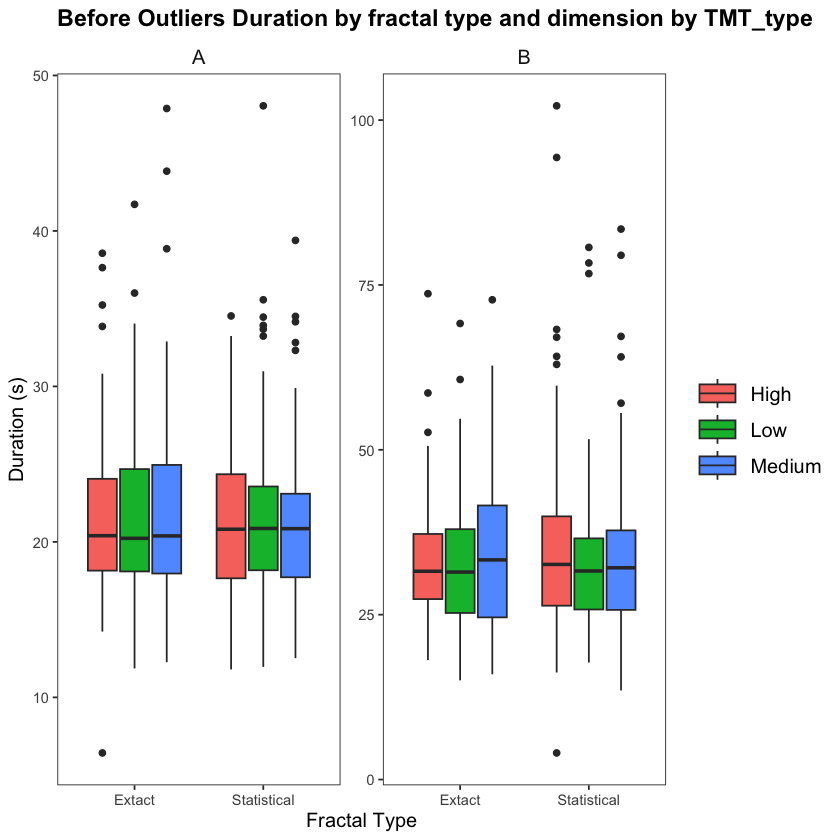

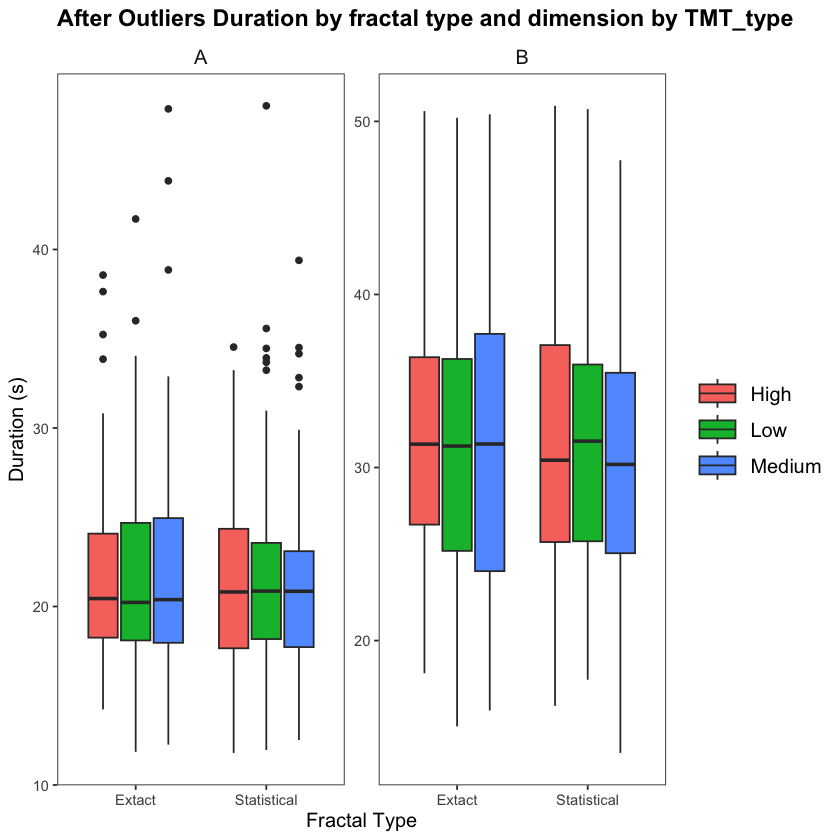

In [19]:
# plot the duration data by S_E and L_M_H facet by TMT_type

# remove baseline
data_collective_nobaseline <- data_collective2[data_collective2$TMT_type != "baseline",]

# remove outlivers more than 2.5 SD
# data_collective_nobaseline <- data_collective_nobaseline[!(data_collective_nobaseline$duration > mean(data_collective_nobaseline$duration) + 2.5 * sd(data_collective_nobaseline$duration)),]

# plot the duration data by S_E and L_M_H facet by TMT_type via raincloud plot

p_before <- ggplot(data = data_collective_nobaseline, aes(x = S_E, y = duration, fill = L_M_H)) +
  geom_boxplot() +
  scale_color_brewer(palette = "Set1") +
  theme(legend.position = "top") +
  facet_wrap(~TMT_type, scales = "free_y") +
  theme_apa() +
  labs(x = "Fractal Type", y = "Duration (s)", title = "Before Outliers Duration by fractal type and dimension by TMT_type")

p_before

# print rows with duration less than 10s 
print(data_collective_nobaseline[data_collective_nobaseline$duration < 10,])
# remove all rows with duration less than 10s
data_collective_nobaseline <- data_collective_nobaseline[data_collective_nobaseline$duration > 10,]

# remove outlivers more than 2.5 SD
data_collective_nobaseline <- data_collective_nobaseline[!(data_collective_nobaseline$duration > mean(data_collective_nobaseline$duration) + 2 * sd(data_collective_nobaseline$duration)),]

p_after <- ggplot(data = data_collective_nobaseline, aes(x = S_E, y = duration, fill = L_M_H)) +
  geom_boxplot() +
  scale_color_brewer(palette = "Set1") +
  theme(legend.position = "top") +
  facet_wrap(~TMT_type, scales = "free_y") +
  theme_apa() +
  labs(x = "Fractal Type", y = "Duration (s)", title = "After Outliers Duration by fractal type and dimension by TMT_type")

p_after
# # anova for duration

# duration_anova <- ezANOVA(data = data_collective_nobaseline, dv = duration, wid = subject, within = .(S_E, L_M_H, TMT_type))
# # knit table
# knitr::kable(duration_anova)
# # apa style for publication
# # apa.ezANOVA.table(duration_anova)

# # Pairwise comparisons for duration by TMT_type
# # Include TMT_type in the model
# model <- lmer(duration ~ S_E * L_M_H * TMT_type + (1 | subject), data = data_collective_nobaseline)
# emmeans_model <- emmeans(model, ~ S_E * L_M_H | TMT_type)
# pairwise_results <- pairs(emmeans_model)

# # Print pairwise comparison results
# knitr::kable(pairwise_results)


# # t-test for duration by S_E on duration by TMT_type

# # TMT_type A

# ttest_A <- t.test(duration ~ S_E, data = data_collective_nobaseline[data_collective_nobaseline$TMT_type == "A",])
# # TMT_type B
# ttest_B <- t.test(duration ~ S_E, data = data_collective_nobaseline[data_collective_nobaseline$TMT_type == "B",])

# # Print t-test results
# ttest_A
# ttest_B

library(lmerTest)
library(lme4)

# relevel LMH to Low
data_collective_nobaseline$L_M_H <- factor(data_collective_nobaseline$L_M_H, levels = c("Low", "Medium", "High"))
data_collective_nobaseline$L_M_H <- relevel(data_collective_nobaseline$L_M_H, ref = "Low")


# LMER duration ~ S_E * L_M_H * TMT_type + (1 | subject)
model <- lmer(duration ~ S_E * L_M_H * TMT_type + accuracy + (1 | subject) , data = data_collective_nobaseline)


model1 <- lmer(duration ~ S_E * L_M_H + (1 | subject), data = data_collective_nobaseline)

tab_model(model)
#tab_model(model1)

,subject,date,block,trial,order,condition,trigger_time,start_time,end_time,duration,accuracy,attempts,errors,avg_line_length,shortest_path,relative_length,response_order,TMT_type,S_E,L_M_H
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>
3,0FJ87G,2025_Feb_01_1058,2,1,A,"['A', 'E-L']",2/1/2025 11:35,2260.478,2288.327,27.84909,1,0,0,286182.4,5051.904,5664.843,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,Low
5,0FJ87G,2025_Feb_01_1058,3,1,B,"['B', 'E-L']",2/1/2025 11:37,2341.193,2377.875,36.68292,1,0,0,264950.7,5011.951,5286.378,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",B,Extact,Low
6,0FJ87G,2025_Feb_01_1058,3,2,B,"['B', 'E-L']",2/1/2025 11:37,2379.959,2410.657,30.69768,1,0,0,298909.6,5011.951,5963.937,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",B,Extact,Low
11,0FJ87G,2025_Feb_01_1058,6,1,A,"['A', 'E-M']",2/1/2025 11:42,2637.834,2663.646,25.81154,1,0,0,249476.4,5051.904,4938.264,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,Medium
14,0FJ87G,2025_Feb_01_1058,7,2,A,"['A', 'E-H']",2/1/2025 11:43,2739.622,2765.606,25.98470,1,0,0,266863.7,5049.996,5284.433,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,High
17,0FJ87G,2025_Feb_01_1058,9,1,A,"['A', 'S-H']",2/1/2025 11:46,2879.605,2904.458,24.85289,1,0,0,274122.2,5051.904,5426.117,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Statistical,High


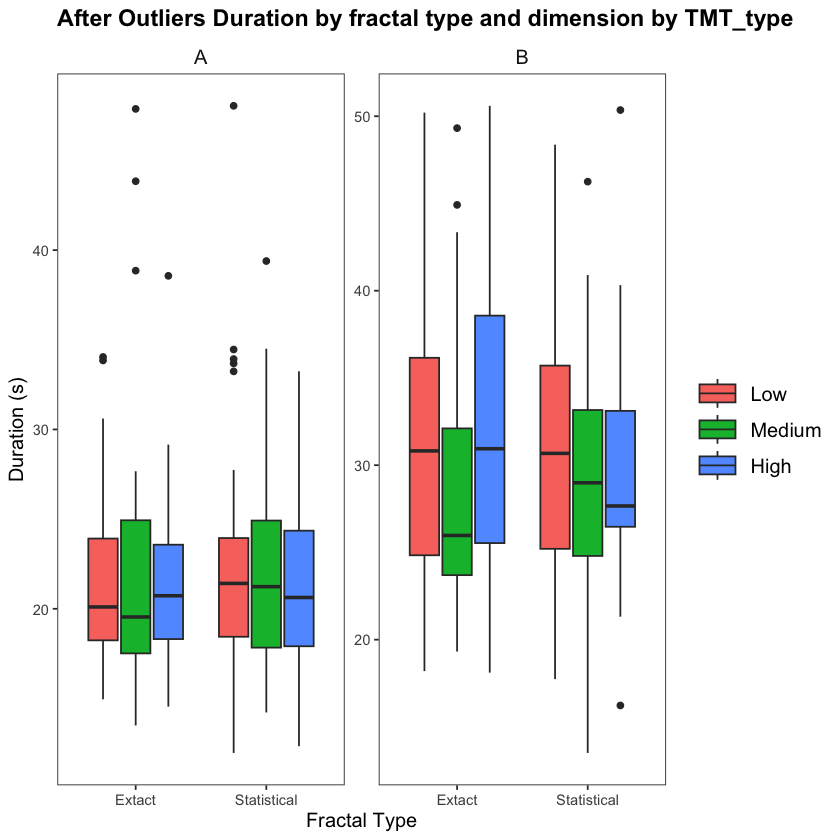

In [26]:
# olny 100% accuuracy 
only_correct <- data_collective_nobaseline[data_collective_nobaseline$accuracy == 1.00,]

head(only_correct)

model1 <- lmer(duration ~ S_E * L_M_H * TMT_type + (1 | subject), data = only_correct)

tab_model(model1)
#tab_model(model1)


p_after <- ggplot(data = only_correct, aes(x = S_E, y = duration, fill = L_M_H)) +
  geom_boxplot() +
  scale_color_brewer(palette = "Set1") +
  theme(legend.position = "top") +
  facet_wrap(~TMT_type, scales = "free_y") +
  theme_apa() +
  labs(x = "Fractal Type", y = "Duration (s)", title = "After Outliers Duration by fractal type and dimension by TMT_type")

p_after


In [27]:
# summary statistics for S_E and L_M_H and TMT_type

data_c <- data_collective_nobaseline %>%
  group_by(S_E, L_M_H, TMT_type) %>%
  summarise(mean_duration = mean(duration, na.rm = TRUE),
            sd_duration = sd(duration, na.rm = TRUE),
            # min
            min_duration = min(duration, na.rm = TRUE),
            # max
            max_duration = max(duration, na.rm = TRUE),
            n = n()) %>%
  ungroup()

# Print the summary statistics
print(data_c)



`summarise()` has grouped output by 'S_E', 'L_M_H'. You can override using the
`.groups` argument.


# A tibble: 12 x 8
   S_E        L_M_H TMT_type mean_duration sd_duration min_duration max_duration
   <chr>      <fct> <chr>            <dbl>       <dbl>        <dbl>        <dbl>
 1 Extact     Low   A                 21.6        5.58         11.9         41.7
 2 Extact     Low   B                 31.2        7.80         15.0         50.2
 3 Extact     Medi~ A                 21.9        6.53         12.3         47.9
 4 Extact     Medi~ B                 31.8        8.77         16.0         50.4
 5 Extact     High  A                 21.9        5.34         14.2         38.6
 6 Extact     High  B                 31.9        7.52         18.1         50.6
 7 Statistic~ Low   A                 21.7        5.94         12.0         48.0
 8 Statistic~ Low   B                 31.5        7.97         17.7         50.7
 9 Statistic~ Medi~ A                 21.4        5.14         12.5         39.4
10 Statistic~ Medi~ B                 30.2        7.60         13.5         47.8
11 Statis

## Redefining error 

check the number of datas

In [28]:
# ────────────────────────────────────────────────────────────────────────────
# Quick sanity‑check: does every subject have 26 rows, 26 non‑NA errors, 
# and 26 non‑NA accuracy values?
# ────────────────────────────────────────────────────────────────────────────


library(dplyr)

summary_check <- data_collective2 %>%
  group_by(subject) %>%
  summarise(
    total_rows   = n(),                       # total trials per subject
    n_error      = sum(!is.na(errors)),       # non‑NA errors
    n_accuracy   = sum(!is.na(accuracy)),     # non‑NA accuracy
    .groups = "drop"
  )

print(summary_check)

# If you want to see only the subjects that *do not* meet the 26‑row criterion:
summary_check %>% 
  filter(total_rows != 26 | n_error != 26 | n_accuracy != 26) %>% 
  print()

# A tibble: 36 x 4
   subject total_rows n_error n_accuracy
   <chr>        <int>   <int>      <int>
 1 0FJ87G          26      26         26
 2 1L9FCD          26      26         26
 3 1LCED7          26      26         26
 4 4VP5UW          26      26         26
 5 5Z6HUD          26      26         26
 6 6AAVN4          26      26         26
 7 86L56R          26      26         26
 8 AAU5L2          26      26         26
 9 CNYTQ6          26      26         26
10 E3R3C1          26      26         26
# i 26 more rows
# A tibble: 0 x 4
# i 4 variables: subject <chr>, total_rows <int>, n_error <int>,
#   n_accuracy <int>


Re‑define “errors” 


In [56]:
###############################################################################
# TMT‑ERROR PIPELINE
# ------------------
# * Input   : the already‑loaded dataframe `data_collective2`
#             (baseline rows and bad subjects have been removed)
# * Output  : a CSV with per‑trial error breakdown, saved to:
#             /Users/jiaonahu/Documents/fractalvr-data/AllSubjects_errorsCategorized.csv
# * Purpose : compute, for every A/B trial, four error categories
#             (length / missing / duplicate / order) and a total.
# * Assumes : columns subject, TMT_type, response_order, plus anything else
#             you already have (block, trial, etc.).  Uses tidyverse.
###############################################################################

# ── 0. Load tidyverse helpers ────────────────────────────────────────────────
library(dplyr)
library(stringr)
library(purrr)


# ── 1. Keep only TMT‑A & TMT‑B trials ───────────────────────────────────────
tmt_ab <- data_collective2 %>%                 # 
  filter(TMT_type %in% c("A", "B"))

# ── 2. Reference sequence (0 … 24) ───────────────────────────────────────────
correct_seq <- 0:24                        # length 25

# ── 3. Row‑wise error calculation ───────────────────────────────────────────
###############################################################################
# TMT‑ERROR PIPELINE  –  English version (no double‑penalty for duplicates)
###############################################################################
library(dplyr)
library(stringr)
library(purrr)

# 1) Keep only TMT‑A / TMT‑B trials
tmt_ab <- data_collective2 %>% 
  filter(TMT_type %in% c("A", "B"))

# 2) Correct reference sequence
correct_seq <- 0:24          # length 25

# 3) Row‑wise error metrics + accuracy
error_tbl <- tmt_ab %>%
  mutate(
    # Parse response_order into a numeric vector (list column)
    response_vec = str_extract_all(response_order, "\\d+") %>% map(as.numeric),

    # ---- error components ---------------------------------------------------
    # length_error: 1 if length != 25
    length_error    = if_else(map_int(response_vec, length) != 25, 1L, 0L),

    # missing_error: how many of 0:24 are absent?
    missing_error   = map_int(response_vec, ~ length(setdiff(correct_seq, .x))),

    # duplicate_error: extra clicks (total – unique)
    duplicate_error = map_int(response_vec, ~ length(.x) - length(unique(.x))),

    # order_error: count neighbour jumps that are neither +1 nor 0
    #   (0 means a duplicate – we already count that in duplicate_error)
    order_error     = map_int(response_vec, ~ {
                       if (length(.x) < 2) return(0L)
                       diffs <- diff(.x)
                       sum(diffs != 1 & diffs != 0)
                     }),

    # total_error: simple sum of the four components
    total_error     = length_error + missing_error + duplicate_error + order_error,

    # accuracy: proportion correct (0 – 1); multiply *100 for %
    new_accuracy        = (25 - total_error) / 25
  ) %>%
  select(
    subject, TMT_type, response_order,
    length_error, missing_error, duplicate_error, order_error,
    total_error, new_accuracy
  )

# ── 4. Per‑subject sanity check (24 trials each?) ────────────────────────────
check <- error_tbl %>%
  count(subject, name = "trial_count")

bad_subj <- check %>% filter(trial_count != 24) %>% pull(subject)

# ── 5. Save CSV ──────────────────────────────────────────────────────────────
out_file <- "/Users/jiaonahu/Documents/fractalvr-data/AllSubjects_errorsCategorized.csv"
write.csv(error_tbl, out_file, row.names = FALSE)

# ── 6. Console message ───────────────────────────────────────────────────────
if (length(bad_subj) == 0) {
  message(
    "✅  All subjects have 24 A/B trials. File saved to:\n    ", out_file
  )
} else {
  warning(
    "⚠️  File saved to ", out_file,
    "\n    BUT the following subjects do not have 24 A/B trials:\n    ",
    paste(bad_subj, collapse = ", ")
  )
}

###############################################################################



<U+2705>  All subjects have 24 A/B trials. File saved to:
    /Users/jiaonahu/Documents/fractalvr-data/AllSubjects_errorsCategorized.csv



In [ ]:
# remove outliers from data_collective2 ad then jouu

,subject,date,block,trial,order,condition,trigger_time,start_time,end_time,duration,accuracy,attempts,errors,avg_line_length,shortest_path,relative_length,response_order,TMT_type,S_E,L_M_H
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
1,0FJ87G,2025_Feb_01_1058,1,1,0,baseline,2/1/2025 11:35,2212.477,2225.850,13.37354,1.00,0,0,143832.5,2459.816,5847.288,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",baseline,baseline,baseline
2,0FJ87G,2025_Feb_01_1058,1,2,0,baseline,2/1/2025 11:35,2227.927,2238.374,10.44793,1.00,0,0,125966.2,2459.816,5120.959,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]",baseline,baseline,baseline
3,0FJ87G,2025_Feb_01_1058,2,1,A,"['A', 'E-L']",2/1/2025 11:35,2260.478,2288.327,27.84909,1.00,0,0,286182.4,5051.904,5664.843,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,Low
4,0FJ87G,2025_Feb_01_1058,2,2,A,"['A', 'E-L']",2/1/2025 11:36,2290.403,2319.085,28.68161,0.92,0,2,266562.9,5011.951,5318.546,"[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,Low
5,0FJ87G,2025_Feb_01_1058,3,1,B,"['B', 'E-L']",2/1/2025 11:37,2341.193,2377.875,36.68292,1.00,0,0,264950.7,5011.951,5286.378,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",B,Extact,Low
6,0FJ87G,2025_Feb_01_1058,3,2,B,"['B', 'E-L']",2/1/2025 11:37,2379.959,2410.657,30.69768,1.00,0,0,298909.6,5011.951,5963.937,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",B,Extact,Low
7,0FJ87G,2025_Feb_01_1058,4,1,B,"['B', 'E-H']",2/1/2025 11:38,2432.771,2471.131,38.36059,0.68,0,8,294538.5,5049.996,5832.449,"[0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 13, 19, 20, 21, 22, 23, 24]",B,Extact,High
8,0FJ87G,2025_Feb_01_1058,4,2,B,"['B', 'E-H']",2/1/2025 11:39,2473.224,2504.999,31.77511,0.84,0,4,264490.6,5049.996,5237.441,"[0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 17, 19, 20, 21, 22, 23, 24]",B,Extact,High
9,0FJ87G,2025_Feb_01_1058,5,1,B,"['B', 'E-M']",2/1/2025 11:40,2527.110,2568.209,41.09874,0.64,0,9,299255.6,5049.996,5925.857,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 13, 19, 21, 22, 20, 23, 24]",B,Extact,Medium


In [65]:
# ── Add total_error & new_accuracy to data_collective_nobaseline ────────────
library(dplyr)

# remove outliers from data_collective2 and then join

data_collective_nobaseline2 <- data_collective2[data_collective2$TMT_type != "baseline",]


## 1) Safety check: the two objects must have identical row counts
stopifnot(
  nrow(data_collective_nobaseline2) == nrow(error_tbl)
)

## 2) If row order is GUARANTEED to match (fastest) ───────────────
data_collective_nobaseline2 <- data_collective_nobaseline2 %>%
  mutate(
    total_error  = error_tbl$total_error,
    new_accuracy = error_tbl$new_accuracy
  )

# -----------------------------------------------------------------
#  ALTERNATIVE (robust) : match on keys instead of relying on order
# -----------------------------------------------------------------
# data_collective_nobaseline <- data_collective_nobaseline %>%
#   left_join(
#     error_tbl %>% 
#       select(subject, TMT_type, response_order, total_error, new_accuracy),
#     by = c("subject", "TMT_type", "response_order")
#   )


In [66]:
data_collective_nobaseline2

,subject,date,block,trial,order,condition,trigger_time,start_time,end_time,duration,...,errors,avg_line_length,shortest_path,relative_length,response_order,TMT_type,S_E,L_M_H,total_error,new_accuracy
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,...,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
3,0FJ87G,2025_Feb_01_1058,2,1,A,"['A', 'E-L']",2/1/2025 11:35,2260.478,2288.327,27.84909,...,0,286182.4,5051.904,5664.843,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,Low,0,1.00
4,0FJ87G,2025_Feb_01_1058,2,2,A,"['A', 'E-L']",2/1/2025 11:36,2290.403,2319.085,28.68161,...,2,266562.9,5011.951,5318.546,"[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,Low,3,0.88
5,0FJ87G,2025_Feb_01_1058,3,1,B,"['B', 'E-L']",2/1/2025 11:37,2341.193,2377.875,36.68292,...,0,264950.7,5011.951,5286.378,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",B,Extact,Low,0,1.00
6,0FJ87G,2025_Feb_01_1058,3,2,B,"['B', 'E-L']",2/1/2025 11:37,2379.959,2410.657,30.69768,...,0,298909.6,5011.951,5963.937,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",B,Extact,Low,0,1.00
7,0FJ87G,2025_Feb_01_1058,4,1,B,"['B', 'E-H']",2/1/2025 11:38,2432.771,2471.131,38.36059,...,8,294538.5,5049.996,5832.449,"[0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 13, 19, 20, 21, 22, 23, 24]",B,Extact,High,6,0.76
8,0FJ87G,2025_Feb_01_1058,4,2,B,"['B', 'E-H']",2/1/2025 11:39,2473.224,2504.999,31.77511,...,4,264490.6,5049.996,5237.441,"[0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 17, 19, 20, 21, 22, 23, 24]",B,Extact,High,6,0.76
9,0FJ87G,2025_Feb_01_1058,5,1,B,"['B', 'E-M']",2/1/2025 11:40,2527.110,2568.209,41.09874,...,9,299255.6,5049.996,5925.857,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 13, 19, 21, 22, 20, 23, 24]",B,Extact,Medium,6,0.76
10,0FJ87G,2025_Feb_01_1058,5,2,B,"['B', 'E-M']",2/1/2025 11:41,2570.292,2615.713,45.42096,...,6,378787.7,5012.717,7556.535,"[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 20, 22, 23, 19, 24]",B,Extact,Medium,8,0.68
11,0FJ87G,2025_Feb_01_1058,6,1,A,"['A', 'E-M']",2/1/2025 11:42,2637.834,2663.646,25.81154,...,0,249476.4,5051.904,4938.264,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",A,Extact,Medium,0,1.00


In [57]:
# ---------------------------------------------------------------
# 1. Diagnose which rows do / do not match between the two tables
# ---------------------------------------------------------------
library(dplyr)

# Key columns that uniquely identify a trial
keys <- c("subject", "TMT_type", "response_order")

# Rows present in the main table but missing in error_tbl
rows_missing_error <- anti_join(
  data_collective_nobaseline,
  error_tbl %>% select(all_of(keys)),
  by = keys
)

# Rows present in error_tbl but missing in the main table
rows_extra_error <- anti_join(
  error_tbl %>% select(all_of(keys)),
  data_collective_nobaseline,
  by = keys
)

cat(
  "Rows in data_collective_nobaseline but NOT in error_tbl: ",
  nrow(rows_missing_error), "\n"
)
cat(
  "Rows in error_tbl but NOT in data_collective_nobaseline: ",
  nrow(rows_extra_error), "\n"
)

# If you want to inspect the mismatches, uncomment either line below
# View(rows_missing_error)
# View(rows_extra_error)


Rows in data_collective_nobaseline but NOT in error_tbl:  0 
Rows in error_tbl but NOT in data_collective_nobaseline:  35 


In [59]:
error_tbl

subject,TMT_type,response_order,length_error,missing_error,duplicate_error,order_error,total_error,new_accuracy
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
0FJ87G,A,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",0,0,0,0,0,1.00
0FJ87G,A,"[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",0,0,0,3,3,0.88
0FJ87G,B,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",0,0,0,0,0,1.00
0FJ87G,B,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",0,0,0,0,0,1.00
0FJ87G,B,"[0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 13, 19, 20, 21, 22, 23, 24]",0,0,0,6,6,0.76
0FJ87G,B,"[0, 1, 2, 3, 5, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 17, 19, 20, 21, 22, 23, 24]",0,0,0,6,6,0.76
0FJ87G,B,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 13, 19, 21, 22, 20, 23, 24]",0,0,0,6,6,0.76
0FJ87G,B,"[0, 2, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 20, 22, 23, 19, 24]",0,0,0,8,8,0.68
0FJ87G,A,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]",0,0,0,0,0,1.00


In [58]:
# ──────────────────────────────────────────────────────────────
#  Check: does every subject appear exactly 24 times?
# ──────────────────────────────────────────────────────────────
library(dplyr)

# 1) Row counts per subject in each data frame ---------------
main_counts  <- data_collective_nobaseline %>% 
  count(subject, name = "n_main")

error_counts <- error_tbl %>% 
  count(subject, name = "n_error")

# 2) Combine the two counts (full join keeps all subjects) ---
count_compare <- full_join(main_counts, error_counts, by = "subject") %>% 
  mutate(
    n_main  = coalesce(n_main,  0L),   # replace NA with 0
    n_error = coalesce(n_error, 0L)
  )

# 3) Identify subjects that deviate from 24 rows -------------
bad_main  <- count_compare %>% filter(n_main  != 24) %>% select(subject, n_main)
bad_error <- count_compare %>% filter(n_error != 24) %>% select(subject, n_error)

# 4) Report results ------------------------------------------
if (nrow(bad_main) == 0) {
  message("✅  All subjects have 24 rows in data_collective_nobaseline.")
} else {
  cat("⚠️  Subjects with ≠24 rows in data_collective_nobaseline:\n")
  print(bad_main)
}

if (nrow(bad_error) == 0) {
  message("✅  All subjects have 24 rows in error_tbl.")
} else {
  cat("⚠️  Subjects with ≠24 rows in error_tbl:\n")
  print(bad_error)
}

# (Optional) View the full comparison table:
# View(count_compare)


<U+26A0><U+FE0F>  Subjects with <U+2260>24 rows in data_collective_nobaseline:
   subject n_main
1   0FJ87G     94
2   1L9FCD     56
3   1LCED7     90
4   4VP5UW    155
5   5Z6HUD    130
6   6AAVN4     58
7   86L56R    138
8   AAU5L2     87
9   CNYTQ6     52
10  E3R3C1    108
11  F3N17K     75
12  FA5FCX    119
13  FX4L2F     49
14  GE00WM     78
15  GH9FPG     78
16  J3R7L4     50
17  JREJ7A    160
18  KQT35L     95
19  KWCTKJ    116
20  MARMAA     56
21  MNQJJL     31
22  MPN87Y    104
23  N6FGR8     36
24  PVAA50    156
25  RJ70HQ     98
26  RQGUR7    108
27  V3MK4V    110
28  V4JN59     84
29  VJRPUP    138
30  VM3K4U    124
31  VU30R8    100
32  VVXYT5    110
33  X37HQQ     75
34  XRDKL8     76
35  Y98J0U    137
36  Z6WJKG     26


<U+2705>  All subjects have 24 rows in error_tbl.



check errors

anova CHECK FOR MISSING CELLS IN SUBJECT × S_E × L_M_H × TMT_TYPE COMBINATIONS

In [21]:
library(dplyr)
library(tidyr)

# 1. Count the number of observations per subject × S_E × L_M_H × TMT_type
cell_counts <- data_mod %>%
  group_by(subject, S_E, L_M_H, TMT_type) %>%
  summarise(n = n(), .groups = "drop") %>%
  # 2. Complete the grid of all 2×3×2 = 12 possible combinations, filling missing with zero
  complete(subject, S_E, L_M_H, TMT_type, fill = list(n = 0))

# 3. Filter to show only the combinations that have zero observations
missing_cells <- cell_counts %>%
  filter(n == 0)

# Print the results
print(missing_cells)

# A tibble: 9 x 5
  subject S_E         L_M_H  TMT_type     n
  <chr>   <chr>       <fct>  <chr>    <int>
1 86L56R  Extact      Medium B            0
2 86L56R  Statistical Medium B            0
3 86L56R  Statistical High   B            0
4 N6FGR8  Statistical High   B            0
5 V3MK4V  Statistical Medium B            0
6 X37HQQ  Extact      Medium B            0
7 X37HQQ  Extact      High   B            0
8 X37HQQ  Statistical Low    B            0
9 X37HQQ  Statistical Medium B            0


## new error and sccuracy analyse

## old accuracy

Warning message:
"Converting "subject" to factor for ANOVA."
Warning message:
"Converting "S_E" to factor for ANOVA."
Warning message:
"Converting "L_M_H" to factor for ANOVA."
Warning message:
"Converting "TMT_type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."




|   |Effect             | DFn| DFd|          F|         p|p<.05 |       ges|
|:--|:------------------|---:|---:|----------:|---------:|:-----|---------:|
|2  |S_E                |   1|  35|  0.4043400| 0.5289927|      | 0.0008317|
|3  |L_M_H              |   2|  70|  0.0737142| 0.9290091|      | 0.0002459|
|4  |TMT_type           |   1|  35| 15.4748598| 0.0003779|*     | 0.0756318|
|5  |S_E:L_M_H          |   2|  70|  0.1507782| 0.8603170|      | 0.0005474|
|6  |S_E:TMT_type       |   1|  35|  2.9370842| 0.0954119|      | 0.0052346|
|7  |L_M_H:TMT_type     |   2|  70|  0.4434469| 0.6436107|      | 0.0014344|
|8  |S_E:L_M_H:TMT_type |   2|  70|  2.2455601| 0.1134420|      | 0.0075478|

|   |Effect             |         W|         p|p<.05 |
|:--|:------------------|---------:|---------:|:-----|
|3  |L_M_H              | 0.9781803| 0.6872607|      |
|5  |S_E:L_M_H          | 0.9353463| 0.3210196|      |
|7  |L_M_H:TMT_type     | 0.9945121| 0.9106919|      |
|8  |S_E:L_M_H:TMT_type | 0.8

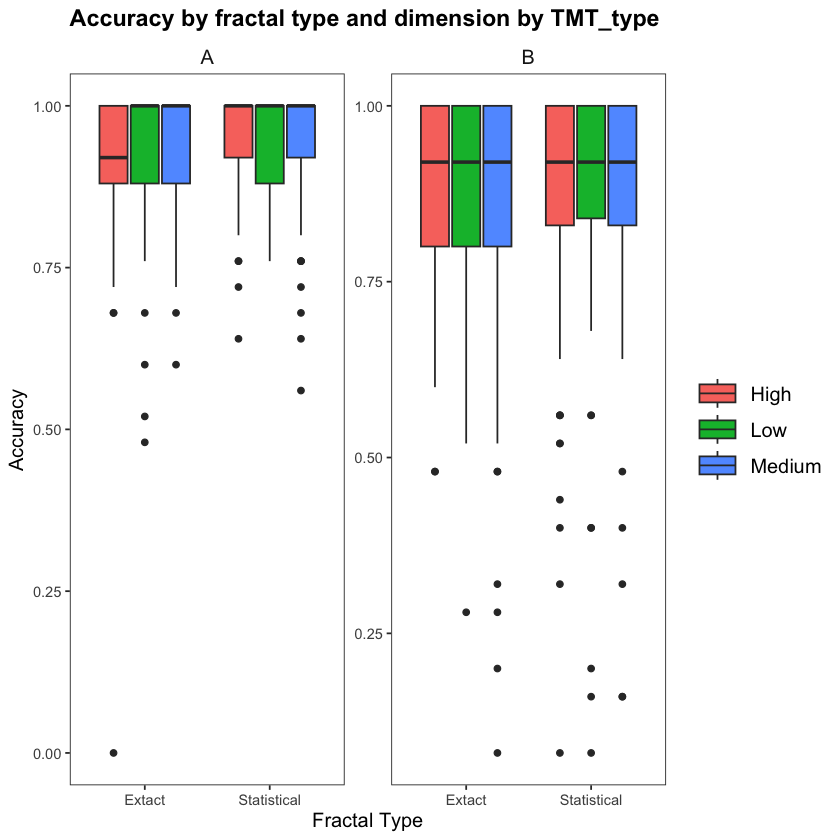

In [67]:
# accuracy 

# plot the accuracy data by S_E and L_M_H facet by TMT_type data_collective_nobaseline

r <- ggplot(data = data_collective_nobaseline2, aes(x = S_E, y = new_accuracy, fill = L_M_H)) +
  geom_boxplot() +
  scale_color_brewer(palette = "Set1") +
  theme(legend.position = "top") +
  facet_wrap(~TMT_type, scales = "free_y") +
  theme_apa() +
  labs(x = "Fractal Type", y = "Accuracy", title = "Accuracy by fractal type and dimension by TMT_type")

r

# anova for accuracy
accuracy_anova <- ezANOVA(data = data_collective_nobaseline2, dv = new_accuracy, wid = subject, within = .(S_E, L_M_H, TMT_type))
# knit table
knitr::kable(accuracy_anova)

# Pairwise comparisons for accuracy by TMT_type
# Include TMT_type in the model
model <- lmer(new_accuracy ~ S_E * L_M_H * TMT_type + (1 | subject), data = data_collective_nobaseline2)



# Print pairwise comparison results


tab_model(model)

In [156]:
data_collective_nobaseline$errors <- as.numeric(data_collective_nobaseline$errors)

Warning message:
"Converting "subject" to factor for ANOVA."
Warning message:
"Converting "S_E" to factor for ANOVA."
Warning message:
"Converting "L_M_H" to factor for ANOVA."
Warning message:
"Converting "TMT_type" to factor for ANOVA."
Warning message:
"Collapsing data to cell means. *IF* the requested effects are a subset of the full design, you must use the "within_full" argument, else results may be inaccurate."




|   |Effect             | DFn| DFd|          F|         p|p<.05 |       ges|
|:--|:------------------|---:|---:|----------:|---------:|:-----|---------:|
|2  |S_E                |   1|  35|  0.4043400| 0.5289927|      | 0.0008317|
|3  |L_M_H              |   2|  70|  0.0737142| 0.9290091|      | 0.0002459|
|4  |TMT_type           |   1|  35| 15.4748598| 0.0003779|*     | 0.0756318|
|5  |S_E:L_M_H          |   2|  70|  0.1507782| 0.8603170|      | 0.0005474|
|6  |S_E:TMT_type       |   1|  35|  2.9370842| 0.0954119|      | 0.0052346|
|7  |L_M_H:TMT_type     |   2|  70|  0.4434469| 0.6436107|      | 0.0014344|
|8  |S_E:L_M_H:TMT_type |   2|  70|  2.2455601| 0.1134420|      | 0.0075478|

|   |Effect             |         W|         p|p<.05 |
|:--|:------------------|---------:|---------:|:-----|
|3  |L_M_H              | 0.9781803| 0.6872607|      |
|5  |S_E:L_M_H          | 0.9353463| 0.3210196|      |
|7  |L_M_H:TMT_type     | 0.9945121| 0.9106919|      |
|8  |S_E:L_M_H:TMT_type | 0.8

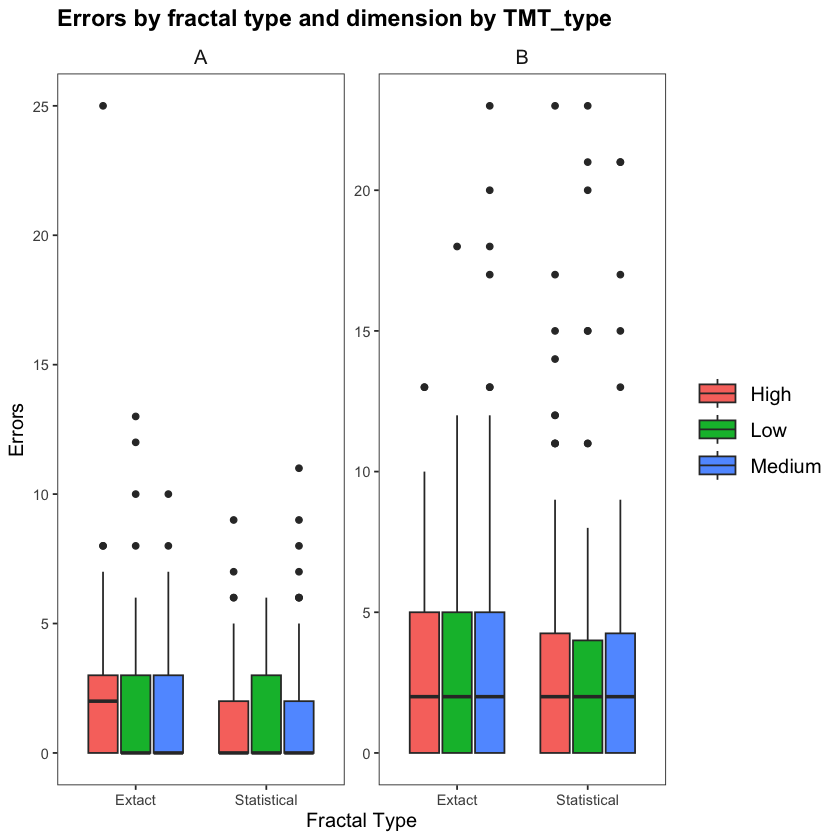

In [68]:
# do the same for errors

# plot the errors data by S_E and L_M_H facet by TMT_type data_collective_nobaseline

s <- ggplot(data = data_collective_nobaseline2, aes(x = S_E, y = total_error, fill = L_M_H)) +
  geom_boxplot() +
  scale_color_brewer(palette = "Set1") +
  theme(legend.position = "top") +
  facet_wrap(~TMT_type, scales = "free_y") +
  theme_apa() +
  labs(x = "Fractal Type", y = "Errors", title = "Errors by fractal type and dimension by TMT_type")
s

# anova for errors
errors_anova <- ezANOVA(data = data_collective_nobaseline2, dv =total_error, wid = subject, within = .(S_E, L_M_H, TMT_type))
# knit table
knitr::kable(errors_anova)

# Pairwise comparisons for errors by TMT_type
# Include TMT_type in the model

model <- lmer(errors ~ S_E * L_M_H * TMT_type + (1 | subject), data = data_collective_nobaseline2)


tab_model(model)

In [1]:
library(ez)

ezDesign(
  data = data_collective_nobaseline2,
  x = S_E,
  y = L_M_H,
  col = TMT_type
)

ERROR: Error: Objekt 'data_collective_nobaseline2' nicht gefunden


## Socio Demographic Questions check

In [55]:
############################################################
#  Script:   Recode questionnaire data and print APA tables
#  Author:   <Your Name>
#  Date:     2025‑05‑05
############################################################

# ------------------ 0. Install & load required packages ------------------
required_pkgs <- c("tidyverse",   # readr, dplyr, stringr, …
                   "janitor",     # quick tabulation / name cleaning
                   "remotes",     # to install GitHub packages
                   "apaTables")   # extra APA helpers
to_install <- setdiff(required_pkgs, rownames(installed.packages()))
if (length(to_install)) install.packages(to_install, dependencies = TRUE)

# papaja lives on GitHub
if (!requireNamespace("papaja", quietly = TRUE)) {
  remotes::install_github("crsh/papaja")
}

suppressPackageStartupMessages({
  library(tidyverse)
  library(janitor)
  library(apaTables)
  library(papaja)      # provides apa_table()
})

# ------------------ 1. Read the data ------------------
data_file <- "/Users/jiaonahu/Documents/fractalvr-data/SDQ-all.csv"        # <—‑ change to your CSV path
raw_df <- read_csv(data_file, show_col_types = FALSE) %>% 
  clean_names()                   # lower‑case names with underscores

# ------------------ 2. Recode variables ------------------
df <- raw_df %>%
  mutate(
    subject_id = v_1,
    sex = case_when(
      v_32 == 2 ~ "Female",
      v_32 == 3 ~ "Male",
      TRUE      ~ NA_character_
    ),
    handedness = case_when(
      v_35 == 1 ~ "Right‑handed",
      v_35 == 2 ~ "Left‑handed",
      TRUE      ~ NA_character_
    ),
    arch_background = recode_factor(
      v_54,
      `1` = "Yes",
      `2` = "No",
      .default = NA_character_
    ),
    envsci_background = recode_factor(
      v_40,
      `1` = "Yes",
      `2` = "No",
      .default = NA_character_
    ),
    income = factor(
      v_42,
      levels = 1:8,
      labels = c("under €1250",
                 "€1250–1749",
                 "€1750–2249",
                 "€2250–2999",
                 "€3000–3999",
                 "€4000–4999",
                 "over €5000",
                 "no answer")
    ),
    # German‑only native speakers vs all others
    german_native = case_when(
      str_detect(str_to_lower(v_56), "^deu(tsch)?$|^german$") ~ "German only",
      is.na(v_56)                                             ~ NA_character_,
      TRUE                                                    ~ "Other"
    )
  )

# ------------------ 3. Integrity check ------------------
n_subj <- n_distinct(df$subject_id)
message("The data set contains ", n_subj,
        " unique participants (expected = 40).")

# ------------------ 4. APA‑formatted frequency tables ------------------
freq_tables <- list(
  Sex                     = df %>% count(sex)               %>% adorn_totals("row"),
  Handedness              = df %>% count(handedness)        %>% adorn_totals("row"),
  Architecture_background = df %>% count(arch_background)   %>% adorn_totals("row"),
  EnvSci_background       = df %>% count(envsci_background) %>% adorn_totals("row"),
  Income                  = df %>% count(income)            %>% adorn_totals("row"),
  Mother_tongue           = df %>% count(german_native)     %>% adorn_totals("row")
)

# quick console preview
knitr::kable(freq_tables[["Sex"]])
knitr::kable(freq_tables[["Handedness"]])
knitr::kable(freq_tables[["Architecture_background"]])
knitr::kable(freq_tables[["EnvSci_background"]])
knitr::kable(freq_tables[["Income"]])
knitr::kable(freq_tables[["Mother_tongue"]])



for (nm in names(freq_tables)) {
  cat("\n\n### ", nm, " ###\n", sep = "")
  print(
    papaja::apa_table(
      freq_tables[[nm]],
      caption = paste0("Frequencies of ", nm, "."),
      format  = if (interactive()) "markdown" else "latex"  # markdown in console, latex when knitting
    )
  )
}


The data set contains 40 unique participants (expected = 40).





|sex    |  n|
|:------|--:|
|Female | 17|
|Male   | 23|
|Total  | 40|



|handedness          |  n|
|:-------------------|--:|
|Right<U+2011>handed | 40|
|Total               | 40|



|arch_background |  n|
|:---------------|--:|
|Yes             |  3|
|No              | 37|
|Total           | 40|



|envsci_background |  n|
|:-----------------|--:|
|Yes               |  3|
|No                | 37|
|Total             | 40|



|income                    |  n|
|:-------------------------|--:|
|under<U+00A0><U+20AC>1250 | 17|
|<U+20AC>1250<U+2013>1749  |  8|
|<U+20AC>2250<U+2013>2999  |  5|
|<U+20AC>3000<U+2013>3999  |  5|
|<U+20AC>4000<U+2013>4999  |  2|
|over<U+00A0><U+20AC>5000  |  1|
|no<U+00A0>answer          |  2|
|Total                     | 40|



|german_native      |  n|
|:------------------|--:|
|German<U+00A0>only | 28|
|Other              | 12|
|Total              | 40|



### Sex ###
[1] "\n\n\n\\begin{table}[tbp]\n\n\\begin{center}\n\\begin{threeparttable}\n\n\\caption{Frequencies of Sex.}\n\n\\begin{tabular}{ll}\n\\toprule\nsex & \\multicolumn{1}{c}{n}\\\\\n\\midrule\nFemale & 17\\\\\nMale & 23\\\\\nTotal & 40\\\\\n\\bottomrule\n\\end{tabular}\n\n\\end{threeparttable}\n\\end{center}\n\n\\end{table}\n\n\n"
attr(,"class")
[1] "knit_asis"
attr(,"knit_cacheable")
[1] NA


### Handedness ###
[1] "\n\n\n\\begin{table}[tbp]\n\n\\begin{center}\n\\begin{threeparttable}\n\n\\caption{Frequencies of Handedness.}\n\n\\begin{tabular}{ll}\n\\toprule\nhandedness & \\multicolumn{1}{c}{n}\\\\\n\\midrule\nRight<U+2011>handed & 40\\\\\nTotal & 40\\\\\n\\bottomrule\n\\end{tabular}\n\n\\end{threeparttable}\n\\end{center}\n\n\\end{table}\n\n\n"
attr(,"class")
[1] "knit_asis"
attr(,"knit_cacheable")
[1] NA


### Architecture_background ###
[1] "\n\n\n\\begin{table}[tbp]\n\n\\begin{center}\n\\begin{threeparttable}\n\n\\caption{Frequencies of Architecture\\_background.}\n\n\

VR experience